# Importing Libaraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
from tqdm import tqdm
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.math import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

tf.random.set_seed(3)

2024-12-11 16:20:31.304854: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-11 16:20:31.304990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 16:20:31.433961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Data

In [2]:
train = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train" #training_path

dict = {} # dict for labels of y_train
x=0
for folder in  os.listdir(train):
    dict[x] = folder
    x+=1

print(dict)

{0: 'N', 1: 'R', 2: 'space', 3: 'B', 4: 'I', 5: 'del', 6: 'F', 7: 'H', 8: 'E', 9: 'U', 10: 'M', 11: 'X', 12: 'K', 13: 'Q', 14: 'Y', 15: 'S', 16: 'G', 17: 'A', 18: 'O', 19: 'T', 20: 'V', 21: 'Z', 22: 'C', 23: 'P', 24: 'L', 25: 'W', 26: 'D', 27: 'nothing', 28: 'J'}


In [3]:
X_train = []
y_train = []
for key, value in dict.items():  
        path = os.path.join(train,value)
        
        print(value,key)
        
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (150, 150))  # Include resizing from (200, 200,3)
            X_train.append(list(new_array))
            y_train.append(key)

N 0


100%|██████████| 3000/3000 [00:14<00:00, 214.17it/s]


R 1


100%|██████████| 3000/3000 [00:14<00:00, 203.27it/s]


space 2


100%|██████████| 3000/3000 [00:14<00:00, 212.62it/s]


B 3


100%|██████████| 3000/3000 [00:14<00:00, 201.58it/s]


I 4


100%|██████████| 3000/3000 [00:13<00:00, 217.29it/s]


del 5


100%|██████████| 3000/3000 [00:13<00:00, 228.86it/s]


F 6


100%|██████████| 3000/3000 [00:13<00:00, 229.26it/s]


H 7


100%|██████████| 3000/3000 [00:12<00:00, 235.55it/s]


E 8


100%|██████████| 3000/3000 [00:12<00:00, 238.46it/s]


U 9


100%|██████████| 3000/3000 [00:12<00:00, 241.62it/s]


M 10


100%|██████████| 3000/3000 [00:12<00:00, 240.29it/s]


X 11


100%|██████████| 3000/3000 [00:12<00:00, 242.89it/s]


K 12


100%|██████████| 3000/3000 [00:12<00:00, 235.12it/s]


Q 13


100%|██████████| 3000/3000 [00:12<00:00, 244.49it/s]


Y 14


100%|██████████| 3000/3000 [00:12<00:00, 248.94it/s]


S 15


100%|██████████| 3000/3000 [00:12<00:00, 237.51it/s]


G 16


100%|██████████| 3000/3000 [00:12<00:00, 249.44it/s]


A 17


100%|██████████| 3000/3000 [00:12<00:00, 236.54it/s]


O 18


100%|██████████| 3000/3000 [00:12<00:00, 239.26it/s]


T 19


100%|██████████| 3000/3000 [00:12<00:00, 238.94it/s]


V 20


100%|██████████| 3000/3000 [00:12<00:00, 238.99it/s]


Z 21


100%|██████████| 3000/3000 [00:12<00:00, 248.08it/s]


C 22


100%|██████████| 3000/3000 [00:12<00:00, 243.76it/s]


P 23


100%|██████████| 3000/3000 [00:12<00:00, 243.48it/s]


L 24


100%|██████████| 3000/3000 [00:12<00:00, 248.79it/s]


W 25


100%|██████████| 3000/3000 [00:12<00:00, 237.98it/s]


D 26


100%|██████████| 3000/3000 [00:12<00:00, 237.14it/s]


nothing 27


100%|██████████| 3000/3000 [00:12<00:00, 242.88it/s]


J 28


100%|██████████| 3000/3000 [00:12<00:00, 235.21it/s]


* **Display Images from classes**

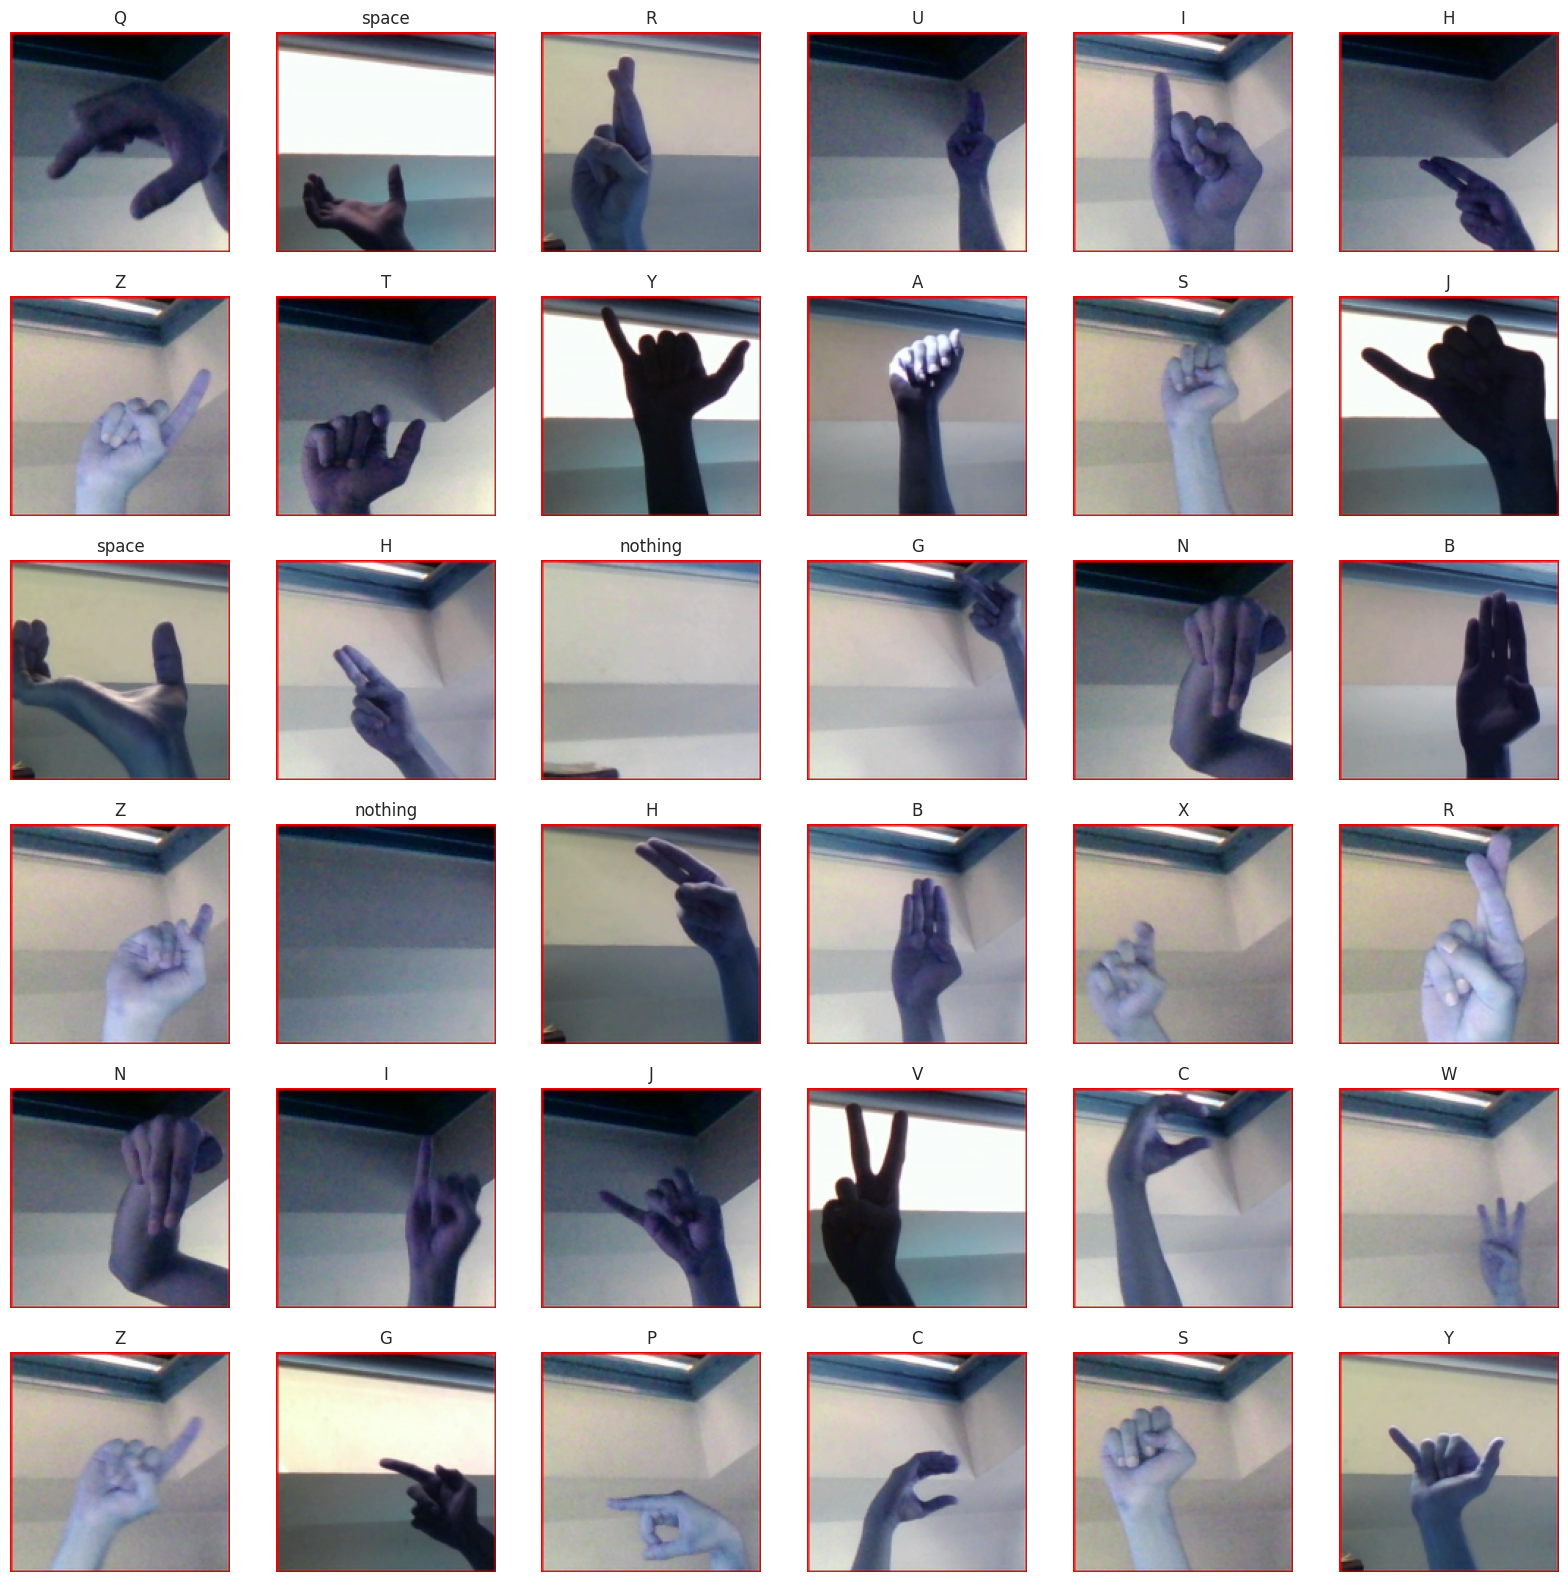

In [4]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(dict[y_train[i]])

# Preprocessing

* ****Convert to numpy arrays****

In [5]:
X_train=np.array(X_train)
y_train=np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(87000, 150, 150, 3)
(87000,)


* ****Split data****

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42,stratify=y_train)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(78300, 150, 150, 3)
(78300,)
(8700, 150, 150, 3)
(8700,)


# Building Model

* **3 Layers (conv -> BatchNorm -> MaxPooling -> Dropout) then Fully Connected Layer**

In [7]:

model = Sequential()

model.add(Conv2D(128, (5, 5), activation='relu',input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(29, activation='softmax')) 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 146, 146, 128)  │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 146, 146, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,541 (1.15 MB)

 Trainable params: 299,069 (1.14 MB)

 Non-trainable params: 1,472 (5.75 KB)

None


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
earlystop = EarlyStopping(monitor="metrics", patience=10, mode="max")
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=2, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [11]:
model.fit(X_train, y_train, epochs=10, callbacks=callbacks)

Epoch 1/10
   3/2447 ━━━━━━━━━━━━━━━━━━━━ 2:14 55ms/step - accuracy: 0.0278 - loss: 5.0455      

I0000 00:00:1733934453.891389     160 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1733934453.906280     160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2447/2447 ━━━━━━━━━━━━━━━━━━━━ 118s 42ms/step - accuracy: 0.3014 - loss: 2.6047 - learning_rate: 0.0010
Epoch 2/10
   3/2447 ━━━━━━━━━━━━━━━━━━━━ 1:48 44ms/step - accuracy: 0.7135 - loss: 0.8003

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `metrics` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.7776 - loss: 0.6411 - learning_rate: 0.0010
Epoch 3/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.8649 - loss: 0.3915 - learning_rate: 0.0010
Epoch 4/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.8991 - loss: 0.2970 - learning_rate: 0.0010
Epoch 5/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.9203 - loss: 0.2412 - learning_rate: 0.0010
Epoch 6/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9284 - loss: 0.2134 - learning_rate: 0.0010
Epoch 7/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9397 - loss: 0.1791 - learning_rate: 0.0010
Epoch 8/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9452 - loss: 0.1620 - learning_rate: 0.0010
Epoch 9/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9500 - loss: 0.1507 - learning_rate: 0.0010
Epoch 10/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9547 - loss: 0.1359 - learni

# Evaluation

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuarcy of the model is : {accuracy*100:.2f} %")

272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9982 - loss: 0.0084
Accuarcy of the model is : 99.78 %


*  **Prediction**

In [13]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred[:20])

272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
[14, 26, 19, 21, 17, 5, 23, 4, 21, 23, 28, 5, 8, 17, 4, 16, 11, 12, 12, 22]


* **Confusion Matrix**

Text(0.5, 131.24999999999997, 'Predicted Labels')

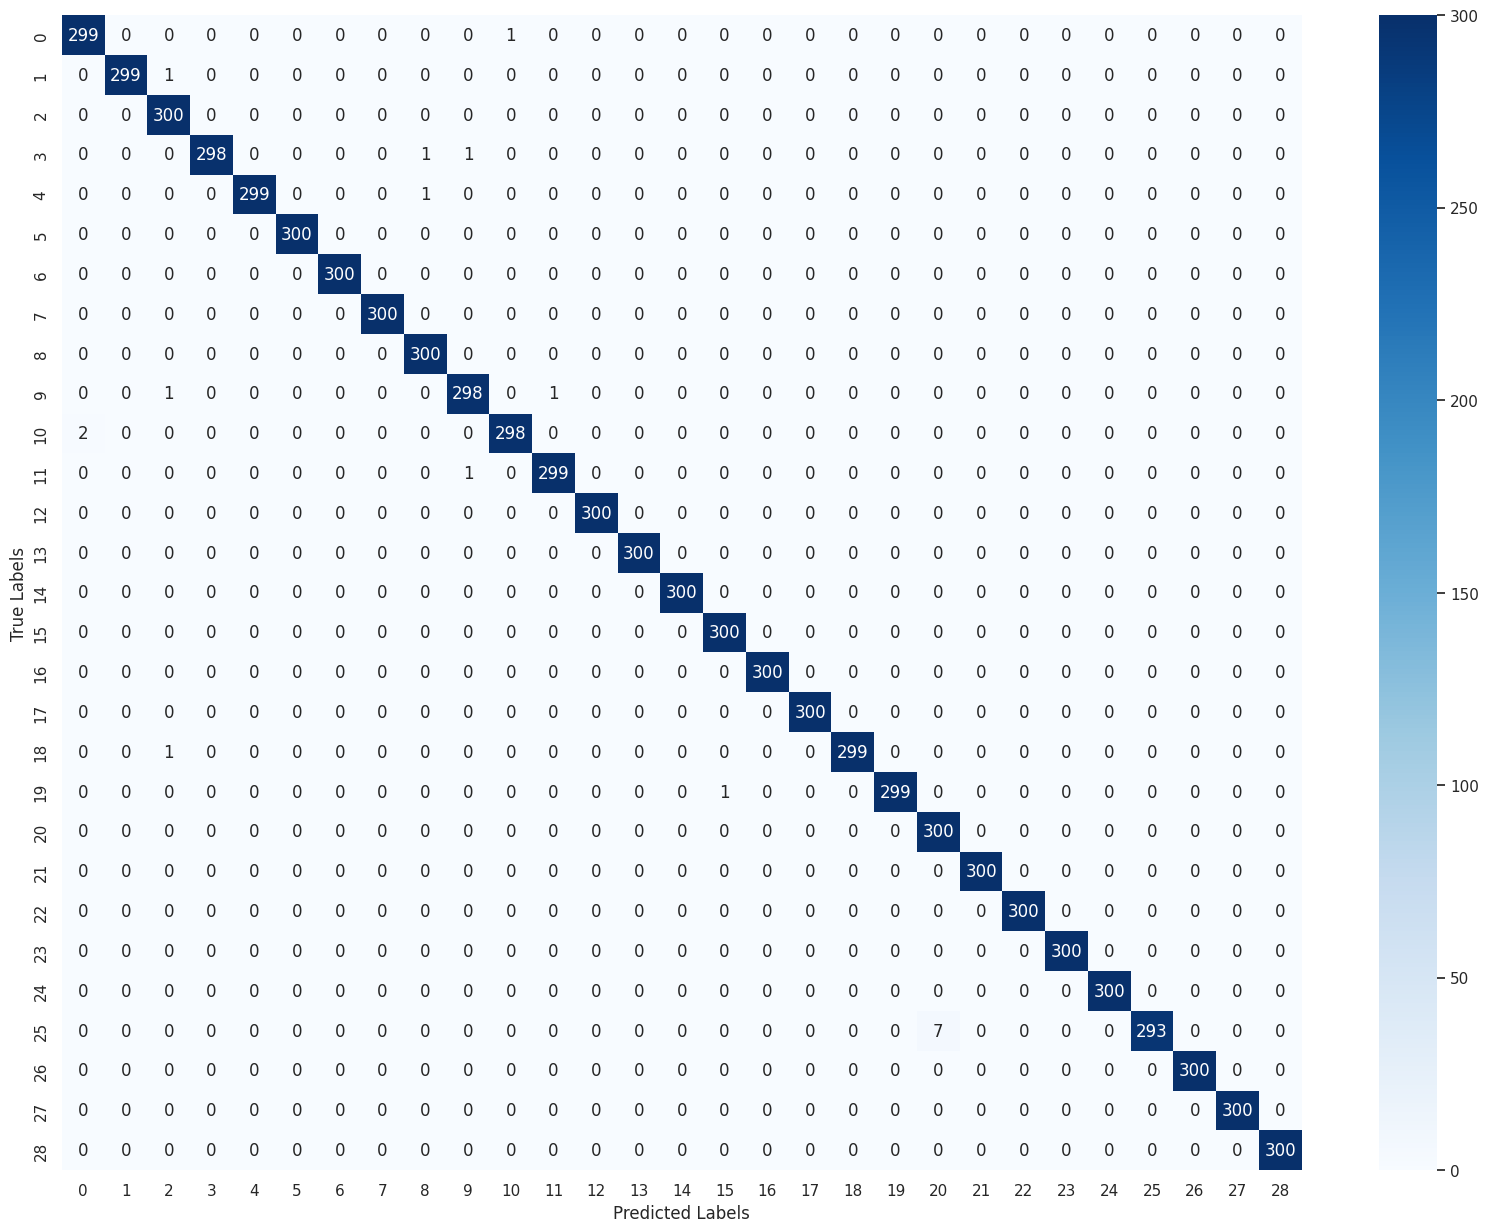

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

* **Classification Report**

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       0.99      1.00      1.00       300
           3       1.00      0.99      1.00       300
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       300
           6       1.00      1.00      1.00       300
           7       1.00      1.00      1.00       300
           8       0.99      1.00      1.00       300
           9       0.99      0.99      0.99       300
          10       1.00      0.99      0.99       300
          11       1.00      1.00      1.00       300
          12       1.00      1.00      1.00       300
          13       1.00      1.00      1.00       300
          14       1.00      1.00      1.00       300
          15       1.00      1.00      1.00       300
          16       1.00      1.00      1.00       300
          17       1.00    

In [16]:
model.save("sign_language_recognition.h5")